# UTN - Diplomatura Superior en Data Science Aplicada

### Módulo VI: Procesamiento de Lenguaje Natural

#### Trabajo Practico: Sentiment Analysis sobre reviews

#### Profesor: Daniel Bridera

#### Autores: Mayhua Estefanía Del Pilar Monserratt - Franco Darío Peralta

## Consigna


A través de este trabajo se busca poder integrar nociones y conocimientos sobre NLP vistas
en el módulo, así como en los previos para generar un modelo de machine learning.
El objetivo que van a tener es construir un clasificador el cual pueda predecir si una revisión
realizada por un usuario es positiva o negativa (buena o mala).
Para ello, utilizaremos un conjunto de datos que pertenece a la plataforma Yelp. Esta, posee
una red de usuarios, los cuales realizan opiniones sobre lugares nocturnos, espacios
culturales, locales comerciales, entre otros.
El dataset a trabajar se encuentra en el siguiente [LINK](https://drive.google.com/drive/folders/1ejChj5ZibHbkZaeHYUkIbsgsJmDEC5QA?usp=drive_link) . Deberán realizar un análisis de
features, así como su preparación necesaria antes de iniciar el desarrollo del modelo.
Objetivos
Deberán generar un modelo de machine learning el cual pueda clasificar review en inglés
para la plataforma Yelp. Es decir, nuestro modelo recibirá una review de un usuario, y
deberá ser capaz de determinar si esta es positiva o negativa.
Dataset


### Las features que contiene este dataset son las siguientes:

- **business_id:** Identificador del negocio al que se está realizando la revisión.
- **cool:** Cantidad de votos por haber sido una revisión "cool".
- **date:** Fecha de realización de la revisión.
- **funny:** Cantidad de votos para una revisión "divertida".
- **review_id:** Identificador único de revisión (ofuscado).
- **stars:** Cantidad de estrellas otorgadas por el usuario en referencia a la review.
- **text:** Revisión realizada por el usuario sobre un determinado negocio.
- **useful:** Cantidad de votos recibidos por los usuarios a los cuales les resultó útil la revisión.
- **user_id:** ID del usuario en la plataforma (ofuscado).


### Consideraciones
- No contamos con una variable target como pasa en problemas de la vida real. Por ello, un desafío extra que se presenta es cómo definir un target, basado en las features del dataset.
-  Muchas veces cuando importamos un dataset pandas infiere que valor podría ser, de no encontrar un valor conocido pone uno por defecto.Validar que los tipos de datos de las features después de importarse correspondan con su valor intrínseco es una buena práctica.
-  Haga una rápida exploración de valores atípicos (outliers) del conjunto de datos.Realice los gráficos que considere pertinente para entender la naturaleza del problema.

### Evaluación
Para la evaluación de los modelos vamos a utilizar las siguientes métricas:
- Precision
- Recall
- F1-score
- Análisis de AUC ROC

### Entrega
Se deberá entregar un notebook en el que se puede reproducir paso a paso todo lo
necesario para la generación del modelo, así como al momento de realizar predicciones.
Todos los pasos donde se hayan tomado decisiones deben estar documentados, así como
cualquier librería o link a una fuente de datos externa

In [ ]:
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
!pip install textacy

from textacy import preprocessing

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
"""Text preprocessing module."""

STOPWORDS_SET = set(stopwords.words('english'))
EMOJI_PATTERN = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)


textacy_preproc = preprocessing.make_pipeline(
        preprocessing.normalize.whitespace,
        preprocessing.remove.accents,
        preprocessing.remove.brackets,
        preprocessing.remove.html_tags,
        preprocessing.replace.currency_symbols,
        preprocessing.replace.emails,
        preprocessing.replace.emojis,
        preprocessing.replace.numbers,
        preprocessing.replace.phone_numbers,
        preprocessing.replace.urls,
        preprocessing.replace.user_handles
)


def remove_stopwords(text):
    """Remove stop words from list of tokenized words."""
    new_words = [word for word in text.split() if word not in STOPWORDS_SET]
    return ' '.join(new_words)

def remove_emoticons(text):
    """Remove emoticos."""
    return EMOJI_PATTERN.sub('', text)


def preprocess_text(text):
    """Preprocess text."""
    clean_text = ""
    clean_text = remove_emoticons(text.lower())
    clean_text = remove_stopwords(clean_text)

    clean_text = textacy_preproc(clean_text)

    return clean_text


PREPROCESS_VECTORIZED = np.vectorize(preprocess_text)


class TextPreProcess(BaseEstimator, TransformerMixin):
    """Text Transformer.

    Perform text preprocessing each text in a list.
    """
    def fit(self, X, y=None):
        """Fit method."""
        return self

    def transform(self, X):
        """Transform input X.

        Args:
            X: array of dictionaries.
        """
        transformed_list = PREPROCESS_VECTORIZED(X)
        return transformed_list

In [ ]:
t = TextPreProcess()

In [ ]:
t.transform(["@spacy_io is OSS for industrial-strength NLP in Python developed by @explosion_ai 💥", "https://test.com es otro ejemplo"])

array(['_USER_ oss industrial-strength nlp python developed _USER_',
       '_URL_ es otro ejemplo'], dtype='<U58')

In [ ]:
# Generamos variables para nombrar a cada modelo/transformador
LOGISTIC = 'logistic'
NAIVE = 'naive_bayes'
TFIDF = 'TFIDF'
COUNT_VEC = 'COUNT_VEC'


VECTORIZER_BY_NAME = {
    TFIDF: TfidfVectorizer(),
    COUNT_VEC: CountVectorizer()
}


MODELS_BY_NAME = {
    LOGISTIC: LogisticRegression(solver='sag', max_iter=10000),
    NAIVE: MultinomialNB()
}

In [ ]:
def get_pipeline(model_name, vectorizer_name):
    """Retrieve sklearn pipeline."""
    pipeline = Pipeline([
        # normalize
        ('normalize', TextPreProcess()),
        # vectorizer
        ('feats', VECTORIZER_BY_NAME[vectorizer_name]),
        ('model', MODELS_BY_NAME[model_name])
    ])

    return pipeline

In [ ]:
pipeline = get_pipeline('logistic', 'TFIDF')

In [ ]:
pipeline

Pipeline(steps=[('normalize', TextPreProcess()), ('feats', TfidfVectorizer()),
                ('model', LogisticRegression(max_iter=10000, solver='sag'))])

# EDA

In [ ]:
df = pd.read_csv(r"C:\Users\franc\Downloads\DSA\DSA-20231216T171352Z-001\DSA\MÓDULO 06\Trabajo Práctico\yelp.csv")

In [ ]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


#### Obtener estadísticas descriptivas del conjunto de datos

In [ ]:
print(df.describe())

              stars          cool        useful         funny
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       3.777500      0.876800      1.409300      0.701300
std        1.214636      2.067861      2.336647      1.907942
min        1.000000      0.000000      0.000000      0.000000
25%        3.000000      0.000000      0.000000      0.000000
50%        4.000000      0.000000      1.000000      0.000000
75%        5.000000      1.000000      2.000000      1.000000
max        5.000000     77.000000     76.000000     57.000000


#### Visualizar la distribución de estrellas (stars)

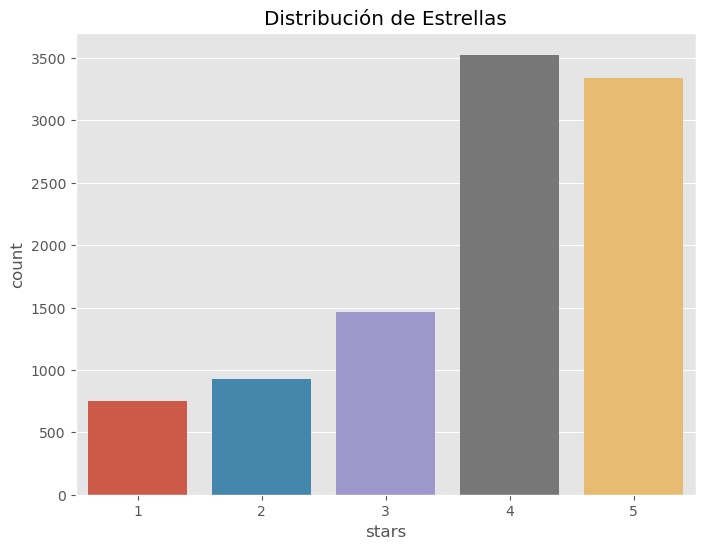

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='stars', data=df)
plt.title('Distribución de Estrellas')
plt.show()

C:\Users\franc\AppData\Local\Temp\ipykernel_9608\1189047584.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = df.groupby('stars')['cool', 'useful', 'funny'].sum().reset_index()


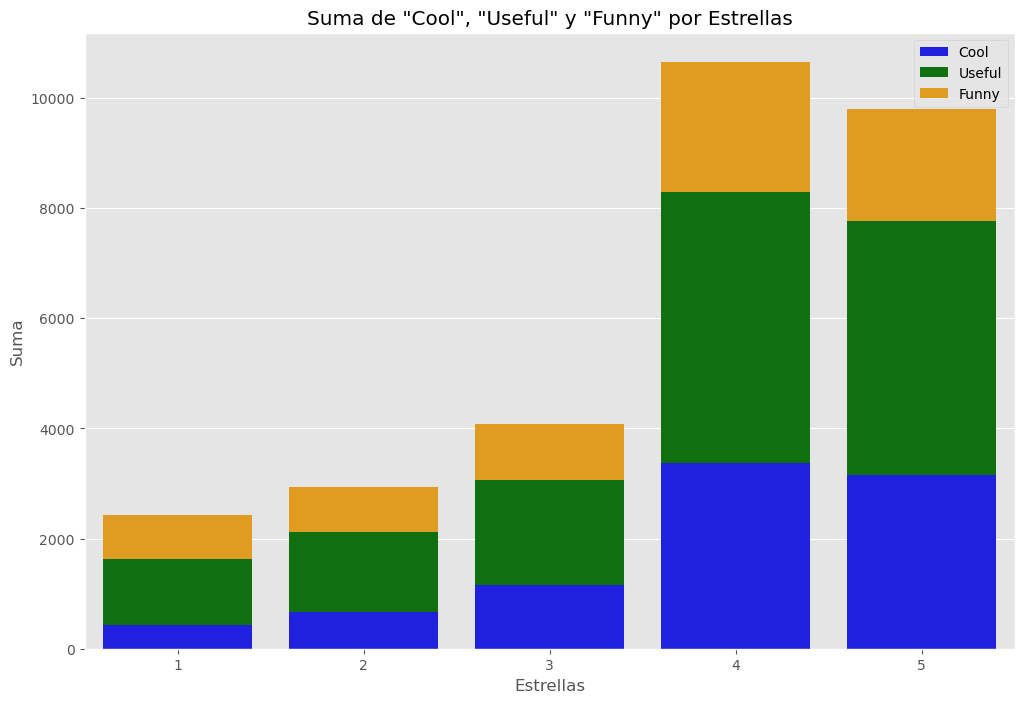

In [ ]:
# Agrupar por estrellas ('stars') y calcular la suma de 'cool', 'useful' y 'funny' en cada grupo
grouped_data = df.groupby('stars')['cool', 'useful', 'funny'].sum().reset_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras apiladas
sns.barplot(x='stars', y='cool', data=grouped_data, color='blue', label='Cool')
sns.barplot(x='stars', y='useful', data=grouped_data, color='green', bottom=grouped_data['cool'], label='Useful')
sns.barplot(x='stars', y='funny', data=grouped_data, color='orange', bottom=grouped_data['cool']+grouped_data['useful'], label='Funny')

# Configurar leyendas y título
plt.title('Suma de "Cool", "Useful" y "Funny" por Estrellas')
plt.xlabel('Estrellas')
plt.ylabel('Suma')
plt.legend()

# Mostrar el gráfico
plt.show()

#### Visualizar la relación entre estrellas y otras variables

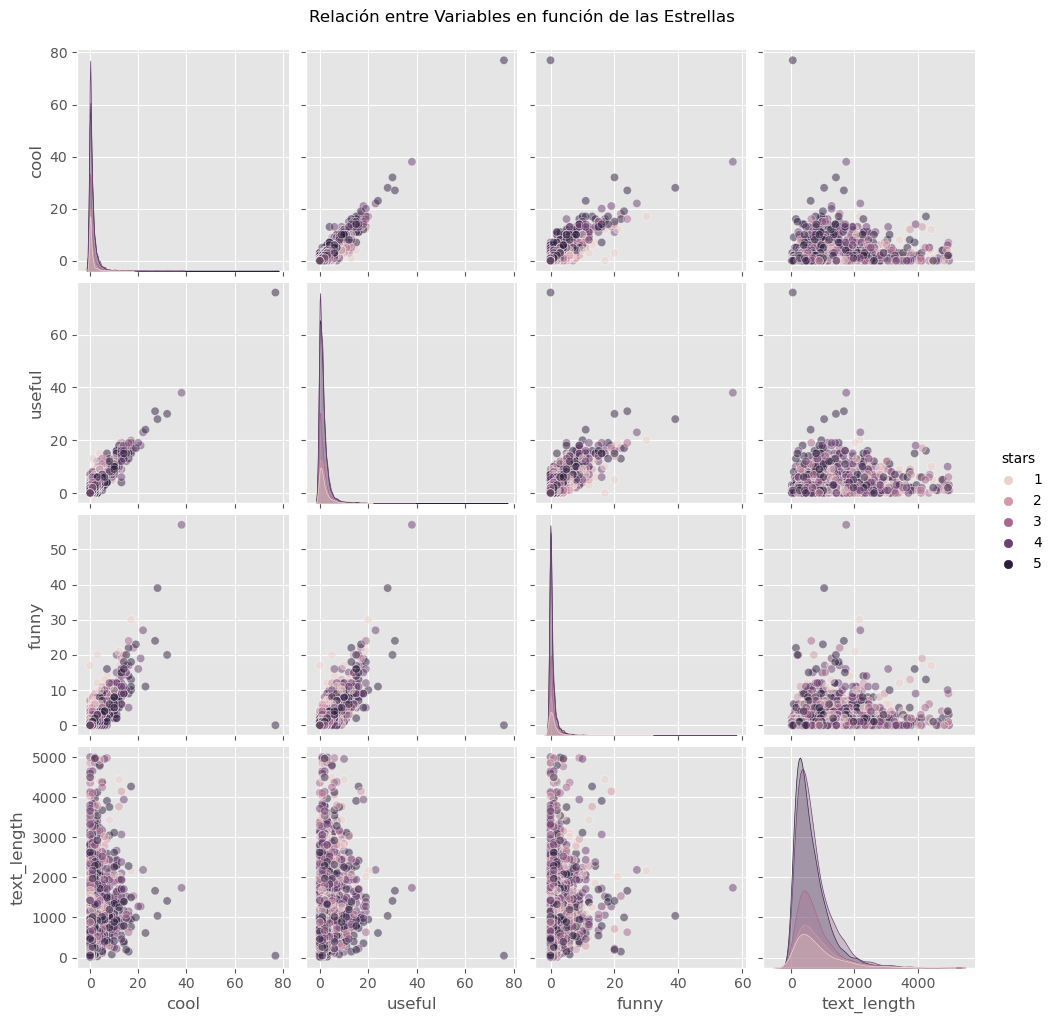

In [ ]:
# Calcular la longitud de las reseñas y agregar la columna 'text_length' al DataFrame
df['text_length'] = df['text'].apply(len)

# Seleccionar las columnas de interés
columns_of_interest = ['stars', 'cool', 'useful', 'funny', 'text_length']
df_subset = df[columns_of_interest]

# Crear un gráfico de pares
sns.pairplot(df_subset, hue='stars', plot_kws={'alpha': 0.5}, height=2.5)
plt.suptitle('Relación entre Variables en función de las Estrellas', y=1.02)
plt.show()


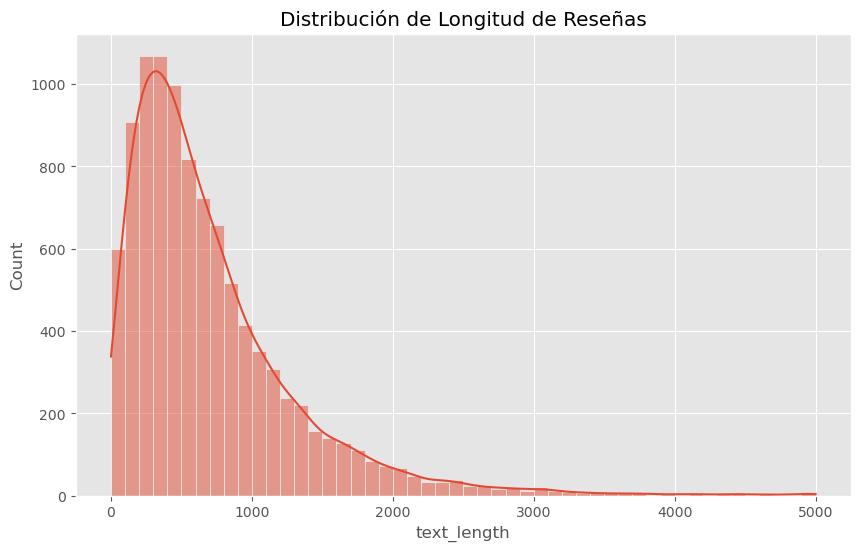

In [ ]:
# Visualizar la distribución de la longitud de las reseñas
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribución de Longitud de Reseñas')
plt.show()

## Generando labels

Necesitamos generar dataset de entrenamiento.  
**Cómo conseguimos las clases?**:  Podemos usar las `stars` para dividir nuestro dataset

In [ ]:
df.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [ ]:
positives = df.query("stars>=4")
negatives = df.query("stars<=2")
neutral = df.query("stars==3")

In [ ]:
positives.shape

(6863, 11)

In [ ]:
negatives.shape

(1676, 11)

In [ ]:
neutral.shape

(1461, 11)

In [ ]:
#podemos armar una función para clasificar en negativa, positiva, neutra
def get_label(star):
    label = ''
    if star >= 4:
        label = 'positive'
    elif star <= 2:
        label = 'negative'
    else:
        label = 'neutral'
    return label

In [ ]:
df['label'] = df.stars.apply(get_label)

In [ ]:
label_counts = df['label'].value_counts()
print(label_counts)

positive    6863
negative    1676
neutral     1461
Name: label, dtype: int64


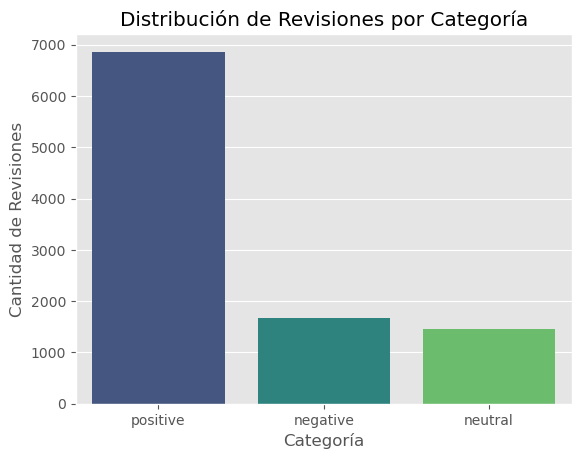

In [ ]:
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')

plt.title('Distribución de Revisiones por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Revisiones')

plt.show()

Ya tenemos nuestros labels!! Se puede observar un desbalance de clases, ya que hay un número significativamente mayor de revisiones clasificadas como "positive" en comparación con "negative" y "neutral".

## Feature selection

Seleccionaremos que features usaremos para nuestro modelo

In [ ]:
df.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'text_length', 'label'],
      dtype='object')

In [ ]:
dataset = df[['text', 'label']]

## Entrenando modelo binario

In [ ]:
binary_dataset = dataset.query("label!='neutral'")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(binary_dataset['text'], binary_dataset['label'],
                                                    random_state=42, test_size=0.2)

print('Number of rows in the total set: {}'.format(binary_dataset.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 8539
Number of rows in the training set: 6831
Number of rows in the test set: 1708


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(binary_dataset['text'], binary_dataset['label'],
                                                    random_state=42, test_size=0.2)
text_preprocessor = TextPreProcess()
X_train_preprocessed = text_preprocessor.transform(X_train)
X_test_preprocessed = text_preprocessor.transform(X_test)


print('Number of rows in the total set: {}'.format(binary_dataset.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 8539
Number of rows in the training set: 6831
Number of rows in the test set: 1708


In [ ]:
import warnings

# Lista de configuraciones de modelos
model_configs = [
    ('logistic', 'TFIDF'),
    ('logistic', 'COUNT_VEC'),
    ('naive_bayes', 'TFIDF'),
    ('naive_bayes', 'COUNT_VEC'),
]

# Diccionario para almacenar los modelos entrenados
trained_models = {}

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    for model_type, vectorizer_type in model_configs:

        pipeline_name = f'{model_type}_{vectorizer_type}'

        pipeline = get_pipeline(model_type, vectorizer_type)

        pipeline.fit(X_train, y_train)

        trained_models[pipeline_name] = pipeline

        print(f'Modelo {model_type} con vectorizador {vectorizer_type} entrenado.')

Modelo logistic con vectorizador TFIDF entrenado.
Modelo logistic con vectorizador COUNT_VEC entrenado.
Modelo naive_bayes con vectorizador TFIDF entrenado.
Modelo naive_bayes con vectorizador COUNT_VEC entrenado.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score

Model: logistic_TFIDF
Pipeline: Pipeline(steps=[('normalize', TextPreProcess()), ('feats', TfidfVectorizer()),
                ('model', LogisticRegression(max_iter=10000, solver='sag'))])

Classification Report:
              precision    recall  f1-score   support

    negative       0.97      0.28      0.44       348
    positive       0.84      1.00      0.91      1360

    accuracy                           0.85      1708
   macro avg       0.91      0.64      0.68      1708
weighted avg       0.87      0.85      0.82      1708



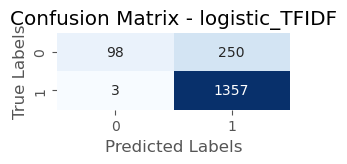

----------------------------------------------------------------------------------------------------
Model: logistic_COUNT_VEC
Pipeline: Pipeline(steps=[('normalize', TextPreProcess()), ('feats', CountVectorizer()),
                ('model', LogisticRegression(max_iter=10000, solver='sag'))])

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.68      0.75       348
    positive       0.92      0.97      0.94      1360

    accuracy                           0.91      1708
   macro avg       0.89      0.82      0.85      1708
weighted avg       0.91      0.91      0.91      1708



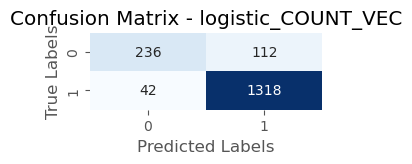

----------------------------------------------------------------------------------------------------
Model: naive_bayes_TFIDF
Pipeline: Pipeline(steps=[('normalize', TextPreProcess()), ('feats', TfidfVectorizer()),
                ('model', MultinomialNB())])

Classification Report:
              precision    recall  f1-score   support

    negative       0.95      0.30      0.46       348
    positive       0.85      1.00      0.92      1360

    accuracy                           0.85      1708
   macro avg       0.90      0.65      0.69      1708
weighted avg       0.87      0.85      0.82      1708



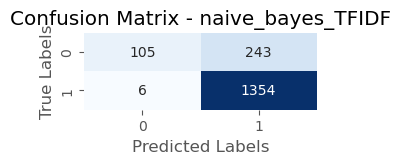

----------------------------------------------------------------------------------------------------
Model: naive_bayes_COUNT_VEC
Pipeline: Pipeline(steps=[('normalize', TextPreProcess()), ('feats', CountVectorizer()),
                ('model', MultinomialNB())])

Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.55      0.66       348
    positive       0.89      0.97      0.93      1360

    accuracy                           0.89      1708
   macro avg       0.87      0.76      0.80      1708
weighted avg       0.88      0.89      0.88      1708



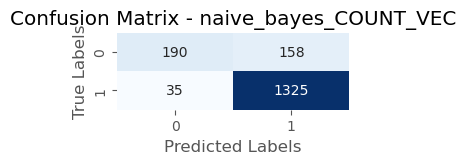

----------------------------------------------------------------------------------------------------


In [ ]:
for model_name, trained_model in trained_models.items():

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)

        y_pred = trained_model.predict(X_test)

        print(f'Model: {model_name}')
        print(f'Pipeline: {trained_model}')

        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)

        print('\nClassification Report:')
        print(class_report)

        plt.figure(figsize=(3, 1))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

        print(100 * '-')

In [ ]:
for model_name, trained_model in trained_models.items():
    # Desactivar temporalmente las advertencias
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)

        y_pred = trained_model.predict(X_test)

        precision = precision_score(y_test, y_pred, average="binary", pos_label='positive')
        recall = recall_score(y_test, y_pred, average="binary", pos_label='positive')
        f1 = f1_score(y_test, y_pred, average="binary", pos_label='positive')
        accuracy = accuracy_score(y_test, y_pred)

        print(f'Model: {model_name}')
        print('\nAccuracy: {:.4f}'.format(accuracy))
        print('Precision score: {:.4f}'.format(precision))
        print('Recall score: {:.4f}'.format(recall))
        print('F1 score: {:.4f}'.format(f1))
        print(100 * '-')

Model: logistic_TFIDF

Accuracy: 0.8519
Precision score: 0.8444
Recall score: 0.9978
F1 score: 0.9147
----------------------------------------------------------------------------------------------------
Model: logistic_COUNT_VEC

Accuracy: 0.9098
Precision score: 0.9217
Recall score: 0.9691
F1 score: 0.9448
----------------------------------------------------------------------------------------------------
Model: naive_bayes_TFIDF

Accuracy: 0.8542
Precision score: 0.8478
Recall score: 0.9956
F1 score: 0.9158
----------------------------------------------------------------------------------------------------
Model: naive_bayes_COUNT_VEC

Accuracy: 0.8870
Precision score: 0.8935
Recall score: 0.9743
F1 score: 0.9321
----------------------------------------------------------------------------------------------------


## Graficando la curva de ROC

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

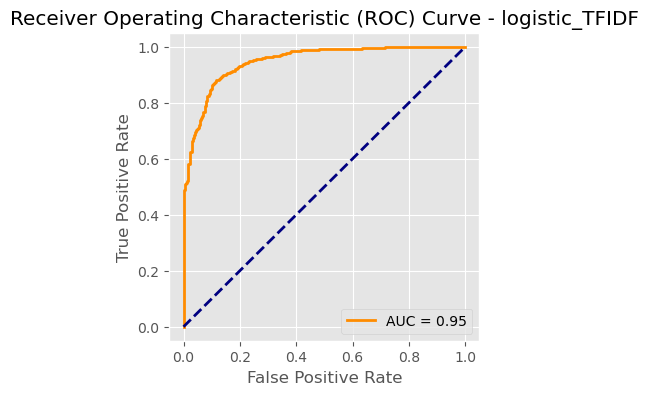

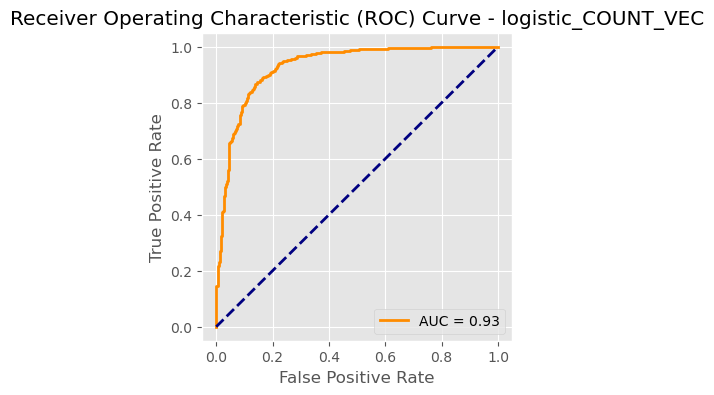

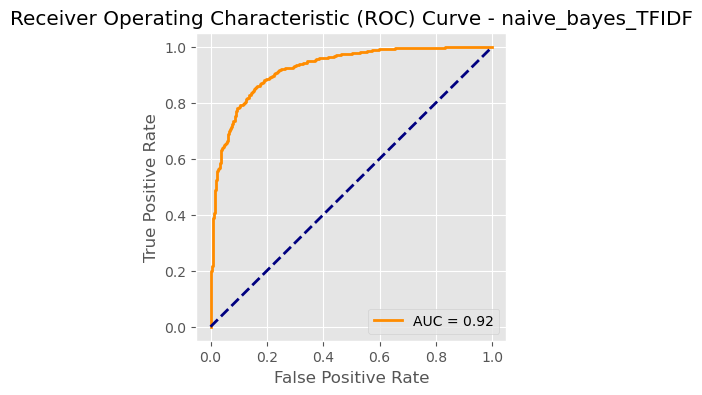

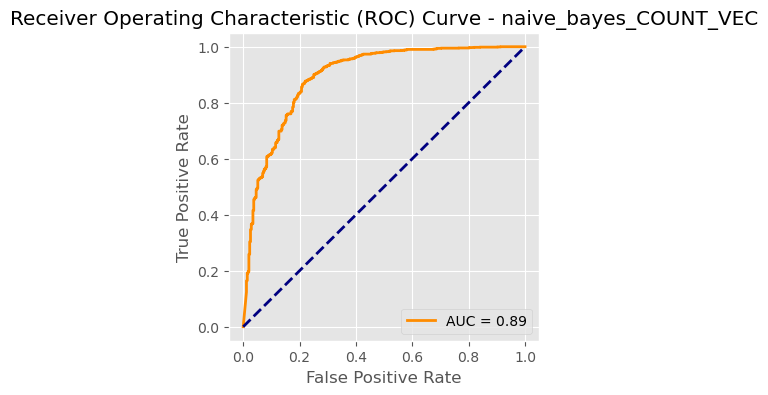

In [ ]:
for model_name, trained_model in trained_models.items():
    # Desactivar temporalmente las advertencias
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)

        y_pred = trained_model.predict(X_test)

        y_probs = trained_model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label='positive')
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(4, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
        plt.legend(loc='lower right')
        plt.show()

## Conclusión

### Modelo: logistic_TFIDF

- **AUC:** 0.95
- **Accuracy:** 0.85
- **Precision (negative):** 0.97
- **Recall (negative):** 0.28
- **Precision (positive):** 0.84
- **Recall (positive):** 1.00
- **F1-score:** 0.82

**Interpretación:** El modelo logistic_TFIDF muestra una buena capacidad de discriminación entre clases, especialmente en la clasificación de la clase positiva. Sin embargo, la baja recall para la clase negativa indica que puede haber dificultades para identificar instancias de esa clase.

---

### Modelo: logistic_COUNT_VEC

- **AUC:** 0.93
- **Accuracy:** 0.91
- **Precision (negative):** 0.85
- **Recall (negative):** 0.68
- **Precision (positive):** 0.92
- **Recall (positive):** 0.97
- **F1-score:** 0.91

**Interpretación:** Este modelo logistic_COUNT_VEC tiene un rendimiento sólido en ambas clases, con una buena precisión y recall. El AUC indica una buena capacidad de discriminación.

---

### Modelo: naive_bayes_TFIDF

- **AUC:** 0.92
- **Accuracy:** 0.85
- **Precision (negative):** 0.95
- **Recall (negative):** 0.30
- **Precision (positive):** 0.85
- **Recall (positive):** 1.00
- **F1-score:** 0.82

**Interpretación:** Aunque el modelo naive_bayes_TFIDF muestra un buen rendimiento en la clasificación de la clase positiva, la baja recall para la clase negativa sugiere limitaciones en la identificación de instancias de esa clase.

---

### Modelo: naive_bayes_COUNT_VEC

- **AUC:** 0.89
- **Accuracy:** 0.89
- **Precision (negative):** 0.84
- **Recall (negative):** 0.55
- **Precision (positive):** 0.89
- **Recall (positive):** 0.97
- **F1-score:** 0.88

**Interpretación:** Este modelo naive_bayes_COUNT_VEC también muestra un buen rendimiento en ambas clases, con una precisión y recall equilibrados. El AUC indica una capacidad razonable de discriminación.

---

### Mejor Modelo: logistic_COUNT_VEC

Dado que el modelo logistic_COUNT_VEC tiene un AUC alto, una precisión y recall equilibrados para ambas clases, y un alto F1-score, puede considerarse como el mejor modelo para aplicar en este caso.


In [ ]:
best_model = trained_models['logistic_COUNT_VEC']

y_pred = best_model.predict(X_test)

df_predictions = pd.DataFrame({'Text': X_test, 'True_Label': y_test, 'Predicted_Label': y_pred})

pd.set_option('display.max_colwidth', None)

print("Model: logistic_COUNT_VEC")
df_predictions.head(10)

Model: logistic_COUNT_VEC


,Text,True_Label,Predicted_Label
7061,"As I'm always on the chase for some of the best spicy tuna rolls, I would say Yen's is up there in my top 5. \n\nI haven't been in for happy hour yet, but I hear it is fantastic! \n\nWord to the wise though...do not get the dessert that looks like a pyramid. I can't even remember what it is called. But it claims to have a caramel center...um, not so much! \n\nIf you can avoid the desserts, then this is a great place for sushi and even specialty rolls. I haven't had any trouble with it being crowded or slow service like some reviews have mentioned. But I've only been for lunch and then another time late at night.",positive,positive
2486,"F724 \n\nShe didn't even look at me, didn't bother asking why I was entering her place of business, didn't reply when I spoke and in no way acknowledged that I was even in her presence. Just handed me a ticket and was done with me. If this happened anywhere else, I would make an effort to never return, tell all my friends how horrible this experience was, and write a scathing review about the deplorable customer service of this business. Sadly, this was my Saturday morning at the DMV, a place I think is modeled after the agonizing depths of Hell. With the same musac score playing...and the same voracious stench in the air..and the same spastic children running around (only in my version of Hell, it's politicians campaigning around me). \n\nSo, I was already running late because I had to complete my emissions test early. Those nice people there not only told me there were only three DMVs open on Saturdays, they gave me a map. How precious. I was fortunate enough to be near one of the only DMVs open on Saturday (Seriously? Three DMVs open on Saturday for the entire Valley?) After receiving such a magnificent welcome, I knew this was quickly going to be among the most painful experiences of my life. To simplify what was so bad, let me make a list of what I feel constitutes acceptable behavior in public: \n\n1) Bathe. The combination of water and soap, along with massaging the skin, creates an outcome that is most pleasing. Be sure to scrub behind your ears and reference this website about another notorious spot : http://www.craigslist.org/about/best/htf/755891987.html \n\n2) Sit still. Yes, I know we're all waiting here for about an hour. But tapping your foot, rocking back and forth in your chair or bouncing your leg aren't going to make time go any faster. Trust me, I was watching the clock. If you feel anxious, get up and walk around. \n\n3) Leash your children. If they cannot sit quietly, leave them in the car. It's winter, they'll be fine. It's not cute when your little monster is running up and down the aisles with his honey bun squeezing out between his fingers. It's even more not cute when he fake-falls five times in a row right in front of me. \n\n4) Maintain quiet tones and ensure appropriate conversations when taking/making calls. To the lady behind me, I'm sorry you're not that experienced in stripping. The first thought that popped into my mind was you had a failed audition for Le Girl. Thanks to your continued conversation, I was able to figure out you were a woodworker. \n\n5) Acknowledge the humans around you. Yeah, I get it. I'm not that big. In fact, if I turn sideways I disappear. But, I'm still right in front of you so pay attention, quit bumping in to me and hitting my leg. Unless that was flirting, in which case you really need to find someone more your level. \n\nOh, the DMV: You have a brilliant recipe for dashing dreams and gutting humanity. And you manage to do it in a painfully lit room that reeks of a combination of my brother's old gym shoes and my dad's dirty underwear. There has to be an award for that, but I don't have the motivation to research it. \n\nOh, and F724 was my number upon entering. I spent and hour and 15 minutes looking at that slip of paper. Just so you know, that one star is for the website (which should probabl

### Prueba con reseñas nuevas

In [ ]:
data_test = {
    'text': [
        "This restaurant exceeded my expectations. The food was delicious, and the service was excellent!",
        "I had a terrible experience at this place. The service was slow, and the food was cold.",
        "Decent food but nothing special. The atmosphere was okay.",
        "I absolutely loved the dishes here. The flavors were amazing, and the staff was friendly.",
        "Not recommended. The quality of the food was poor, and the prices were too high.",
        "Average experience. The service was okay, and the food was decent but not outstanding.",
        "Amazing place! Every dish was a delight, and the ambiance was perfect.",
        "Worst restaurant ever. The service was awful, and the food tasted terrible.",
        "I enjoyed my meal. The service was good, and the prices were reasonable.",
        "Avoid at all costs. The staff was rude, and the food was overpriced.",
        "The food at this restaurant is amazing. I will definitely come back.",
        "I didn't like the experience at all. The food was cold, and the service was slow.",
        "The atmosphere is nice, and the food is delicious. I recommend this place.",
        "I ordered a pizza, and it was a letdown. The crust was raw.",
        "Excellent service, and the food is delicious. My friends and I enjoyed dinner.",
        "I wouldn't recommend this place. The food quality is poor.",
        "The menu is varied, and they have vegetarian options. I loved the pasta.",
        "The food is expensive but worth it. Elegant ambiance and exquisite dishes.",
        "Terrible service. The waiter was rude, and the food took forever to arrive.",
        "I had a great time at this restaurant. The staff is friendly, and the food is top-notch.",
        "The service was excellent, and the food exceeded my expectations.",
        "I had a terrible experience. The waiter was rude, and the food was bland.",
        "This place is a hidden gem. The chef creates culinary masterpieces.",
        "I wouldn't recommend this restaurant. The portions are tiny, and the prices are high.",
        "Great atmosphere, but the food was mediocre. I expected more.",
        "The staff is friendly, and the desserts are heavenly. I'll definitely be back.",
        "Disappointing experience. The dishes lacked flavor, and the service was slow.",
        "A fantastic dining experience. The menu offers a wide variety of delicious options.",
        "I enjoyed my meal, but the prices are a bit steep. Overall, a decent place.",
        "The ambiance is cozy, and the staff is attentive. The seafood dishes are a must-try.",
        "This place promises a flavor explosion, but all I got was a tasteless implosion.",
        "If the service were any slower, I'd have time to grow my own vegetables before my meal arrives.",
        "Calling the chef an artist is an insult to real artists. Stick to your day job.",
        "I asked for a side of excitement with my meal. They served me a plate of boredom instead.",
        "The menu is a novel, and unfortunately, it reads like a tragedy.",
        "If you enjoy waiting for eternity and receiving disappointment as a bonus, this is your spot.",
        "This restaurant is like a puzzle: confusing, frustrating, and missing a few pieces.",
        "I ordered the special, and it was so 'special' that I suspect they were trying to get rid of it.",
        "The only thing consistent about this place is the consistently bad service.",
        "If mediocrity were a destination, this restaurant would be the travel brochure."
    ]
}

text_preprocessor = TextPreProcess()

df_test = pd.DataFrame(data_test)

df_test_transformed = text_preprocessor.transform(df_test['text'])

y_pred = best_model.predict(df_test_transformed)

df_test['predicted_sentiment'] = y_pred
print("DataFrame de prueba con predicciones:")
df_test[['text', 'predicted_sentiment']]


DataFrame de prueba con predicciones:


,text,predicted_sentiment
0,"This restaurant exceeded my expectations. The food was delicious, and the service was excellent!",positive
1,"I had a terrible experience at this place. The service was slow, and the food was cold.",negative
2,Decent food but nothing special. The atmosphere was okay.,negative
3,"I absolutely loved the dishes here. The flavors were amazing, and the staff was friendly.",positive
4,"Not recommended. The quality of the food was poor, and the prices were too high.",negative
5,"Average experience. The service was okay, and the food was decent but not outstanding.",negative
6,"Amazing place! Every dish was a delight, and the ambiance was perfect.",positive
7,"Worst restaurant ever. The service was awful, and the food tasted terrible.",negative
8,"I enjoyed my meal. The service was good, and the prices were reasonable.",positive
9,"Avoid at all costs. The staff was rude, and the food was overpriced.",negative
